# 3a. praca z atrybutami nienumerycznymi oraz skalowanie i transformacja wartości

## ZADANIE

1. Pobrać i wczytać zbiór danych danych dostępny pod adresem: https://archive.ics.uci.edu/dataset/10/automobile.
2. Usunąć wiersze ze zbioru danych, w których występują wartości wybrakowane.
3. Dokonać zamiany wartości tekstowych na numeryczne przy użyciu dwóch poznanych metod, usuwając oryginalny atrybut.

In [1]:
import pandas as pd
import numpy as np

In [5]:
headers = 'symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price'          
auto_data = pd.read_csv('automobile/imports-85.data', header=None, names=headers.split(','))
auto_data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [8]:
#zamienić ? na NaN
auto_data = auto_data.replace(to_replace='?', value= None).copy(deep=True)
auto_data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,None,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,None,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,None,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [9]:
#usunąć rzędy z wartościami wybrakowanymi
auto_data_dn = auto_data.dropna()
auto_data_dn

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [10]:
auto_data_dn['drive-wheels'].value_counts()

drive-wheels
fwd    105
rwd     46
4wd      8
Name: count, dtype: int64

In [11]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
labels = encoder.fit_transform(auto_data_dn[['drive-wheels']]).astype('int64')

Interfejs biblioteki *Scikit-learn* umożliwia alternatywne wywoływanie metod *fit* oraz *transform*, które występują po sobie w postaci *fit_transform*.

In [12]:
labels

array([[1],
       [0],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
    

Uzyskane wartości numeryczne przypisane poszczególnym wartościom tekstowym znalazły się w obiekcie *labels*. Uzyskane wartości można z powodzeniem wykorzystać w ramce danych. Klucz, według którego wartości tekstowe były transformowane do wartości numerycznych znajduje się w atrybucie *categories_* obiektu *encoder*, gdzie pozycja tablicy odpowiada przypisanej liczbie.

In [13]:
encoder.categories_

[array(['4wd', 'fwd', 'rwd'], dtype=object)]

In [14]:
auto_data_dn[['drive-wheels']] = labels
auto_data_dn.sample(10)

C:\Users\1032774\AppData\Local\Temp\ipykernel_26308\3798375996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auto_data_dn[['drive-wheels']] = labels


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
86,1,125,mitsubishi,gas,std,four,sedan,1,front,96.3,...,122,2bbl,3.35,3.46,8.5,88,5000,25,32,8189
158,0,91,toyota,diesel,std,four,sedan,1,front,95.7,...,110,idi,3.27,3.35,22.5,56,4500,34,36,7898
178,3,197,toyota,gas,std,two,hatchback,2,front,102.9,...,171,mpfi,3.27,3.35,9.3,161,5200,20,24,16558
168,2,134,toyota,gas,std,two,hardtop,2,front,98.4,...,146,mpfi,3.62,3.50,9.3,116,4800,24,30,9639
187,2,94,volkswagen,diesel,turbo,four,sedan,1,front,97.3,...,97,idi,3.01,3.40,23.0,68,4500,37,42,9495
78,2,161,mitsubishi,gas,std,two,hatchback,1,front,93.7,...,92,2bbl,2.97,3.23,9.4,68,5500,31,38,6669
137,2,104,saab,gas,turbo,four,sedan,1,front,99.1,...,121,mpfi,3.54,3.07,9.0,160,5500,19,26,18620
13,0,188,bmw,gas,std,four,sedan,2,front,101.2,...,164,mpfi,3.31,3.19,9.0,121,4250,21,28,21105
34,1,101,honda,gas,std,two,hatchback,1,front,93.7,...,92,1bbl,2.91,3.41,9.2,76,6000,30,34,7129
52,1,104,mazda,gas,std,two,hatchback,1,front,93.1,...,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6795


Algorytmy uczące się posiadają zdolność do rozpoznawania wzorców definiowalnych przez liczby. W związku z tym niektóre z nich mogą bardziej istotnie traktować wartość liczbową przypisaną protokołowi UDP niż protokołowi ICMP. W związku z tym warto rozważyć zastosowanie tzw. **kodowanie gorącojedynkowe**, które polega na utworzeniu wektora rzadkiego o rozmiarze *n* (n = liczba różnych wartości tekstowych) z jedną jedynką na pozycji wskazującej daną kategorię. W tym celu należy wykorzystać klasę *OneHotEncoder*.

In [15]:
auto_data_dn = auto_data.dropna()
auto_data_dn

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [16]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
protocol_onehot = encoder.fit_transform(auto_data_dn[['drive-wheels']])

Wynikiem jest obiekt zawierający macierz rzadką, co niesie korzyść w postaci oszczędności pamięci. Za pomocą metody *toarray* można jednak dokonać transformacji do postaci tablicy numpy.

In [17]:
protocol_onehot

<159x3 sparse matrix of type '<class 'numpy.float64'>'
	with 159 stored elements in Compressed Sparse Row format>

In [18]:
protocol_onehot.toarray()

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0

Zastąpienie oryginalnego atrybutu wersją gorącojedynkową niesie za sobą zwiększenie ogólnej liczby atrybutów w ramce. Na każdą kategorię powstaje w takiej sytuacji jeden atrybut.

In [19]:
import pandas as pd

onehot_df = pd.DataFrame(
    protocol_onehot.toarray(),
    columns=encoder.get_feature_names_out(),
    index=auto_data_dn.index
    )

In [20]:
onehot_df

,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd
3,0.0,1.0,0.0
4,1.0,0.0,0.0
6,0.0,1.0,0.0
8,0.0,1.0,0.0
10,0.0,0.0,1.0
...,...,...,...
200,0.0,0.0,1.0
201,0.0,0.0,1.0
202,0.0,0.0,1.0
203,0.0,0.0,1.0


In [21]:
data = auto_data_dn.join(onehot_df)

In [22]:
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.40,10.0,102,5500,24,30,13950,0.0,1.0,0.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.40,8.0,115,5500,18,22,17450,1.0,0.0,0.0
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,3.40,8.5,110,5500,19,25,17710,0.0,1.0,0.0
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,3.40,8.3,140,5500,17,20,23875,0.0,1.0,0.0
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,2.80,8.8,101,5800,23,29,16430,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.15,9.5,114,5400,23,28,16845,0.0,0.0,1.0
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,3.15,8.7,160,5300,19,25,19045,0.0,0.0,1.0
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,2.87,8.8,134,5500,18,23,21485,0.0,0.0,1.0
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,3.40,23.0,106,4800,26,27,22470,0.0,0.0,1.0


In [23]:
#usunięcie oryginalnego atrybutu: kolumny 'Column2' za pomocą operatora del
del data['drive-wheels']
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd
3,2,164,audi,gas,std,four,sedan,front,99.8,176.6,...,3.40,10.0,102,5500,24,30,13950,0.0,1.0,0.0
4,2,164,audi,gas,std,four,sedan,front,99.4,176.6,...,3.40,8.0,115,5500,18,22,17450,1.0,0.0,0.0
6,1,158,audi,gas,std,four,sedan,front,105.8,192.7,...,3.40,8.5,110,5500,19,25,17710,0.0,1.0,0.0
8,1,158,audi,gas,turbo,four,sedan,front,105.8,192.7,...,3.40,8.3,140,5500,17,20,23875,0.0,1.0,0.0
10,2,192,bmw,gas,std,two,sedan,front,101.2,176.8,...,2.80,8.8,101,5800,23,29,16430,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,front,109.1,188.8,...,3.15,9.5,114,5400,23,28,16845,0.0,0.0,1.0
201,-1,95,volvo,gas,turbo,four,sedan,front,109.1,188.8,...,3.15,8.7,160,5300,19,25,19045,0.0,0.0,1.0
202,-1,95,volvo,gas,std,four,sedan,front,109.1,188.8,...,2.87,8.8,134,5500,18,23,21485,0.0,0.0,1.0
203,-1,95,volvo,diesel,turbo,four,sedan,front,109.1,188.8,...,3.40,23.0,106,4800,26,27,22470,0.0,0.0,1.0


4. Dla atrybutów numerycznych, których wartości prezentują lewo- lub prawoskośność, zastosować poznane metody poprawy symetrii. Można zastosować dowolne rozwiązania (nie tylko logarytm i pierwiastek), do uzyskania finalnego rozwiązania warto zastosować jedno rozwiązanie, które zapewnia najbardziej zauważalny efekt na histogramie wynikowym.

<Axes: >

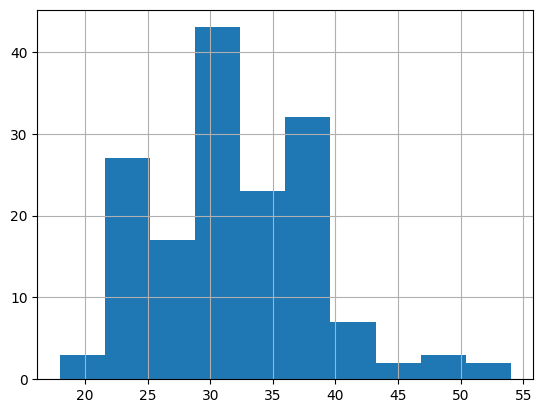

In [24]:
data['highway-mpg'].hist(bins=10)

<Axes: >

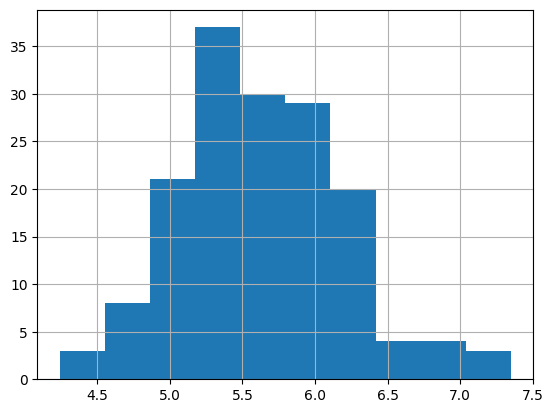

In [25]:
np.sqrt(data['highway-mpg'].astype(float)).hist(bins=10)
#type(data['horsepower'][3])

<Axes: >

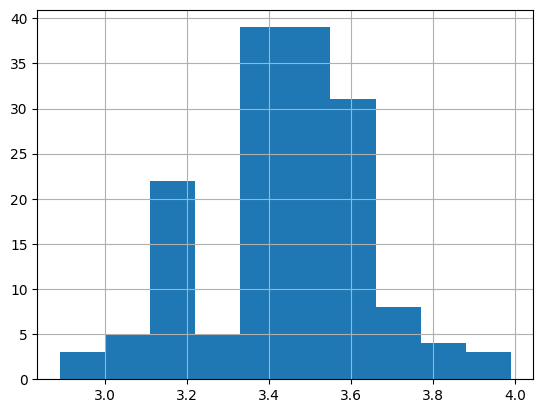

In [26]:
np.log(data['highway-mpg'].astype(float)).hist(bins=10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd
3,2,164,audi,gas,std,four,sedan,front,99.8,176.6,...,3.40,10.0,102,5500,24,5.477226,13950,0.0,1.0,0.0
4,2,164,audi,gas,std,four,sedan,front,99.4,176.6,...,3.40,8.0,115,5500,18,4.690416,17450,1.0,0.0,0.0
6,1,158,audi,gas,std,four,sedan,front,105.8,192.7,...,3.40,8.5,110,5500,19,5.000000,17710,0.0,1.0,0.0
8,1,158,audi,gas,turbo,four,sedan,front,105.8,192.7,...,3.40,8.3,140,5500,17,4.472136,23875,0.0,1.0,0.0
10,2,192,bmw,gas,std,two,sedan,front,101.2,176.8,...,2.80,8.8,101,5800,23,5.385165,16430,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,front,109.1,188.8,...,3.15,9.5,114,5400,23,5.291503,16845,0.0,0.0,1.0
201,-1,95,volvo,gas,turbo,four,sedan,front,109.1,188.8,...,3.15,8.7,160,5300,19,5.000000,19045,0.0,0.0,1.0
202,-1,95,volvo,gas,std,four,sedan,front,109.1,188.8,...,2.87,8.8,134,5500,18,4.795832,21485,0.0,0.0,1.0
203,-1,95,volvo,diesel,turbo,four,sedan,front,109.1,188.8,...,3.40,23.0,106,4800,26,5.196152,22470,0.0,0.0,1.0


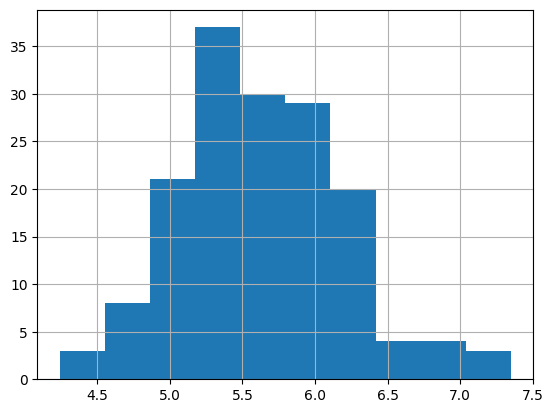

In [27]:
# Change all values in 'highway-mpg' to their square root
data['highway-mpg'] = np.sqrt(data['highway-mpg'])
data['highway-mpg'].hist(bins=10)
data

5. Dokonać normalizacji lub standaryzacji atrybutów numerycznych. Wartości w atrybutach numerycznych powinny w tym celu zostać zamienione na nowe (przetransformowane).

## Skalowanie i transformacja atrybutów liczbowych

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1e-9))
city_mpg_scaled = scaler.fit_transform(data[['city-mpg']])

In [29]:
city_mpg_scaled

array([[2.64705882e-10],
       [8.82352941e-11],
       [1.17647059e-10],
       [5.88235294e-11],
       [2.35294118e-10],
       [2.35294118e-10],
       [1.76470588e-10],
       [1.76470588e-10],
       [9.41176471e-10],
       [6.76470588e-10],
       [6.76470588e-10],
       [6.47058824e-10],
       [4.70588235e-10],
       [2.64705882e-10],
       [4.70588235e-10],
       [4.70588235e-10],
       [4.70588235e-10],
       [2.64705882e-10],
       [1.17647059e-10],
       [1.00000000e-09],
       [4.70588235e-10],
       [6.76470588e-10],
       [4.41176471e-10],
       [4.41176471e-10],
       [4.41176471e-10],
       [4.41176471e-10],
       [3.52941176e-10],
       [3.52941176e-10],
       [3.52941176e-10],
       [3.52941176e-10],
       [2.64705882e-10],
       [2.94117647e-10],
       [0.00000000e+00],
       [4.41176471e-10],
       [4.70588235e-10],
       [4.70588235e-10],
       [4.70588235e-10],
       [4.70588235e-10],
       [3.23529412e-10],
       [3.23529412e-10],


In [30]:
city_mpg_scaled.max(), city_mpg_scaled.min()

(9.999999999999999e-10, 0.0)

<Axes: ylabel='Frequency'>

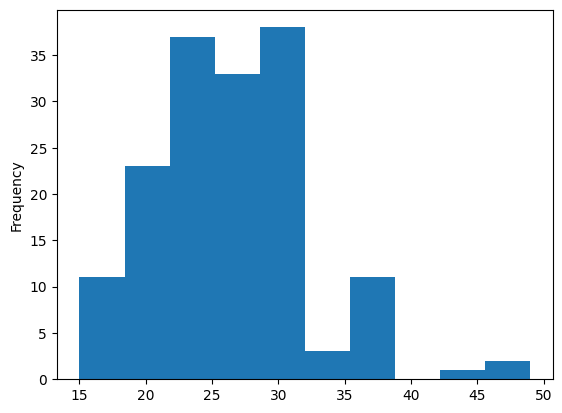

In [31]:
import matplotlib.pyplot as plt

data['city-mpg'].plot.hist(bins=10)

In [32]:
data[['city-mpg']].max()

city-mpg    49
dtype: int64

In [33]:
# podmiana danych w kolumnie '' danymi po normalizacji
data['city-mpg'] = city_mpg_scaled
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd
3,2,164,audi,gas,std,four,sedan,front,99.8,176.6,...,3.40,10.0,102,5500,2.647059e-10,5.477226,13950,0.0,1.0,0.0
4,2,164,audi,gas,std,four,sedan,front,99.4,176.6,...,3.40,8.0,115,5500,8.823529e-11,4.690416,17450,1.0,0.0,0.0
6,1,158,audi,gas,std,four,sedan,front,105.8,192.7,...,3.40,8.5,110,5500,1.176471e-10,5.000000,17710,0.0,1.0,0.0
8,1,158,audi,gas,turbo,four,sedan,front,105.8,192.7,...,3.40,8.3,140,5500,5.882353e-11,4.472136,23875,0.0,1.0,0.0
10,2,192,bmw,gas,std,two,sedan,front,101.2,176.8,...,2.80,8.8,101,5800,2.352941e-10,5.385165,16430,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,front,109.1,188.8,...,3.15,9.5,114,5400,2.352941e-10,5.291503,16845,0.0,0.0,1.0
201,-1,95,volvo,gas,turbo,four,sedan,front,109.1,188.8,...,3.15,8.7,160,5300,1.176471e-10,5.000000,19045,0.0,0.0,1.0
202,-1,95,volvo,gas,std,four,sedan,front,109.1,188.8,...,2.87,8.8,134,5500,8.823529e-11,4.795832,21485,0.0,0.0,1.0
203,-1,95,volvo,diesel,turbo,four,sedan,front,109.1,188.8,...,3.40,23.0,106,4800,3.235294e-10,5.196152,22470,0.0,0.0,1.0
